In [1]:
from Tiramisu import Tiramisu
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
layer_per_block = [4, 5, 7, 10, 12, 15, 12, 10, 7, 5, 4]
model = Tiramisu(layer_per_block)

In [4]:
model.load_weights('weights/prop_tiramisu_weights_67_12_func_10-e7_decay150.hdf5')

In [5]:
test_data = np.load('./data/val_data.npy')
test_label = np.load('./data/val_label.npy')

In [10]:
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    if plot:
        plt.imshow(rgb)
    else:
        return rgb


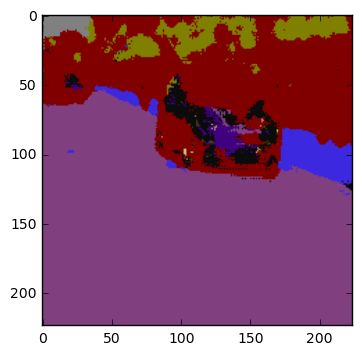

In [24]:
output = model.predict(test_data[0:1])
pred = visualize(np.argmax(output[0],axis=2).reshape((224,224)), False)
plt.imshow(pred)
plt.figure(2)